### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5
#### Бинарная клаccификация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Кармацкий Никита Сергеевич
##### Группа:   НФИбд-01-21

## Москва 2024
***

### Вариант №_26_

Вариант 26 

Parkinsons Disease Data Set 

Название файла: parkinsons.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Parkinsons 

Класс: status (столбец No 18) 

Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier) 

Модели классификации: 

-       классификатор ближайших соседей (к-во соседей = 3) 

-       классификатор ближайших соседей (к-во соседей = 5) 

-       классификатор LDA 

Кривая для визуализации - PR-кривая 

### 1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

In [3]:
my_data = pd.read_csv(url, header=None)
my_data = my_data.drop(columns=my_data.columns[0])
my_data

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,174.18800,230.97800,94.26100,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.40500,...,0.07008,0.02764,19.51700,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
192,209.51600,253.01700,89.48800,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.26300,...,0.04812,0.01810,19.14700,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
193,174.68800,240.00500,74.28700,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.25600,...,0.03804,0.10715,17.88300,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
194,198.76400,396.96100,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.24100,...,0.03794,0.07223,19.02000,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
my_data = my_data.drop(index=0).reset_index(drop=True)
my_data = my_data.rename(columns={17: "class"})
my_data

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,class,18,19,20,21,22,23
0,119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,...,0.06545,0.02211,21.03300,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,...,0.09403,0.01929,19.08500,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.68200,131.11100,111.55500,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.48200,...,0.08270,0.01309,20.65100,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.67600,137.87100,111.36600,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.51700,...,0.08771,0.01353,20.64400,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.01400,141.78100,110.65500,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.58400,...,0.10470,0.01767,19.64900,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.18800,230.97800,94.26100,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.40500,...,0.07008,0.02764,19.51700,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.51600,253.01700,89.48800,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.26300,...,0.04812,0.01810,19.14700,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.68800,240.00500,74.28700,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.25600,...,0.03804,0.10715,17.88300,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.76400,396.96100,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.24100,...,0.03794,0.07223,19.02000,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.


In [5]:
# среди меток класса отсуствуют пропущенные значения

my_data['class'].isnull().sum(axis=0)

0

In [6]:
# расмотрим число уникальных значений, их больше 2

len(my_data['class'].unique())

2

In [7]:
value_counts = my_data['class'].value_counts()
print(value_counts)

1    147
0     48
Name: class, dtype: int64



 

### 3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.


In [8]:
# проверка типов данных
#Строки и стоблец с текстовыми значениями уже удалили
my_data.dtypes

1        object
2        object
3        object
4        object
5        object
6        object
7        object
8        object
9        object
10       object
11       object
12       object
13       object
14       object
15       object
16       object
class    object
18       object
19       object
20       object
21       object
22       object
23       object
dtype: object

In [9]:
# столбцы, которые нужно обработать (столбцы 10-14 имеют тип object)
columns_to_process = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 , 16, 'class',18, 19, 20, 21, 22, 23]

# преобразование столбцов к числовому типу данных
my_data[columns_to_process] = my_data[columns_to_process].apply(pd.to_numeric, errors='coerce')

# замена NaN на средние значения для каждого класса
for column in columns_to_process:
    my_data[column] = my_data.groupby('class')[column].transform(lambda x: x.fillna(x.mean()))

In [10]:
# проверка новых типов данных: классов object больше не обнаружено
# имеет только int и float
my_data.dtypes

1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
class      int64
18       float64
19       float64
20       float64
21       float64
22       float64
23       float64
dtype: object

In [11]:
my_data['class'] = my_data['class'].astype(float) # приведем всё к float
my_data.isnull().sum(axis=0)

1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
class    0
18       0
19       0
20       0
21       0
22       0
23       0
dtype: int64

In [12]:
my_data

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,class,18,19,20,21,22,23
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306



### 4. Выполните стандартизацию признаков набора данных.

In [13]:
y = my_data['class']
X = my_data.drop(columns='class')
X.shape, y.shape

((195, 22), (195,))

In [14]:
from sklearn import preprocessing
X1 = X.to_numpy()
X_scaled = preprocessing.scale(X1)
new_data = pd.DataFrame(X_scaled)
new_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105



 

### 5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.


In [15]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

# Обучаем модель ExtraTreesClassifier
EXC = ExtraTreesClassifier(random_state=42)
fit_model = EXC.fit(new_data, y)

# Получаем важность признаков
feature_importances = fit_model.feature_importances_

#Выводим чтою удостовериться, что выводятся правильные признаки
print(feature_importances)

# Находим два наиболее значимых признака
top_features_indices = feature_importances.argsort()[-2:][::-1]

# Выводим номера выбранных признаков
print("Номера выбранных признаков:", top_features_indices)

[0.10873774 0.05008637 0.07221256 0.02906466 0.04108596 0.0333515
 0.02696996 0.03257795 0.0296487  0.03221968 0.03157059 0.0333882
 0.0361902  0.0294768  0.03267243 0.02662213 0.03240244 0.03967774
 0.1050325  0.05266989 0.04062351 0.08371849]
Номера выбранных признаков: [ 0 18]


In [16]:
# проверка, имеет ли признак больше 10 различных значений
len(new_data[0].unique()) 

195

In [17]:
# проверка, имеет ли признак больше 10 различных значений
len(new_data[18].unique())

195

In [18]:
data2 = new_data[[0,18]]


 

### 6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


In [19]:
y_int = y.astype(int)

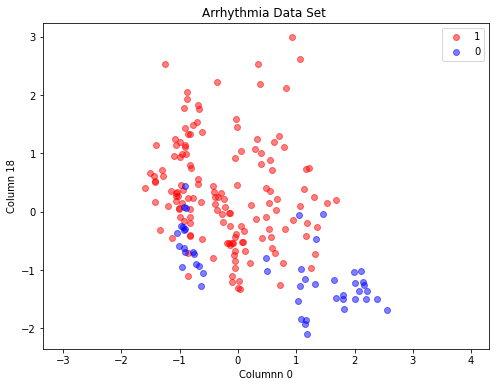

In [20]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
markers = ['o', 'o']


for clr in y_int.unique():
    xx = data2[0].loc[y==clr]
    yy = data2[18].loc[y==clr]
    plt.scatter(xx, yy, c = colors[clr], label=clr,
                marker=markers[clr], alpha=0.5)
plt.axis('equal')
plt.title('Arrhythmia Data Set ')
plt.xlabel('Columnn 0')
plt.ylabel('Column 18')
plt.legend()


 

### 7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.


In [21]:
# разделение набора на выборки
def train_test_split(X, y, test_ratio=0.2, seed=None):
    """returns X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ration must be valid"

    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data2.to_numpy(), y, 0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((137, 2), (137,), (58, 2), (58,))

Модели классификации:

  - классификатор ближайших соседей (к-во соседей = 3) 
  - классификатор ближайших соседей (к-во соседей = 5) 
  - классификатор LDA

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf3 = KNeighborsClassifier(n_neighbors=3)
knn_clf3.fit(X_train, y_train);
y_pred_knn3 = knn_clf3.predict(X_test)

In [24]:
knn_clf5 = KNeighborsClassifier(n_neighbors=5)
knn_clf5.fit(X_train, y_train);
y_pred_knn5 = knn_clf5.predict(X_test)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train);
y_pred_lda = lda.predict(X_test)


 

### 8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.


In [26]:
data2_np = data2.to_numpy()

In [27]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

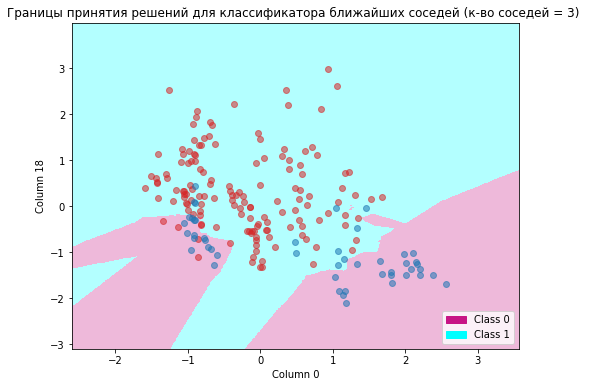

In [28]:
h = 0.01
x_min, x_max = data2_np[:, 0].min() - 1, data2_np[:, 0].max() + 1
y_min, y_max = data2_np[:, 1].min() - 1, data2_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_decision = ListedColormap(['#C71585', '#00FFFF'])

# границы принятия решения
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=cmap_decision, alpha=0.3)

colors = ['tab:blue', 'tab:red']
markers = ['o', 'o']

for clr in y_int.unique():
    xx_class = data2[0].loc[y == clr]  
    yy_class = data2[18].loc[y == clr]  
    plt.scatter(xx_class, yy_class, c=colors[clr], label=clr,
                marker=markers[clr], alpha=0.55)

# Легенда
legend_class0 = mpatches.Patch(color='#C71585', label='Class 0') 
legend_class1 = mpatches.Patch(color='#00FFFF', label='Class 1')  

plt.legend(handles=[legend_class0, legend_class1], loc='lower right')

plt.title("Границы принятия решений для классификатора ближайших соседей (к-во соседей = 3) ")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Column 0')  # Подпись оси X
plt.ylabel('Column 18')  # Подпись оси Y

plt.show()


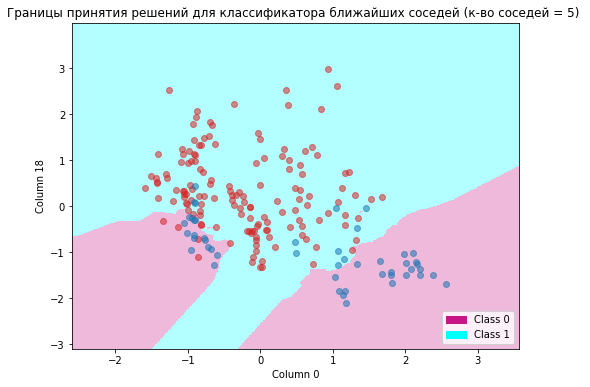

In [29]:
h = 0.01
x_min, x_max = data2_np[:, 0].min() - 1, data2_np[:, 0].max() + 1
y_min, y_max = data2_np[:, 1].min() - 1, data2_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_clf5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_decision = ListedColormap(['#C71585', '#00FFFF'])

# границы принятия решения
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=cmap_decision, alpha=0.3)

colors = ['tab:blue', 'tab:red']
markers = ['o', 'o']

for clr in y_int.unique():
    xx_class = data2[0].loc[y == clr]  
    yy_class = data2[18].loc[y == clr]  
    plt.scatter(xx_class, yy_class, c=colors[clr], label=clr,
                marker=markers[clr], alpha=0.55)

# Легенда
legend_class0 = mpatches.Patch(color='#C71585', label='Class 0')  
legend_class1 = mpatches.Patch(color='#00FFFF', label='Class 1') 

plt.legend(handles=[legend_class0, legend_class1], loc='lower right')

plt.title("Границы принятия решений для классификатора ближайших соседей (к-во соседей = 5) ")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Column 0')  # Подпись оси X
plt.ylabel('Column 18')  # Подпись оси Y

plt.show()


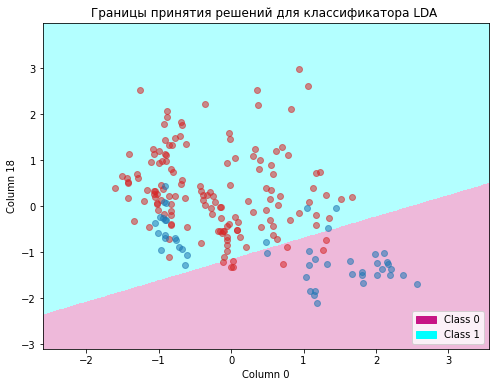

In [30]:
h = 0.01
x_min, x_max = data2_np[:, 0].min() - 1, data2_np[:, 0].max() + 1
y_min, y_max = data2_np[:, 1].min() - 1, data2_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_decision = ListedColormap(['#C71585', '#00FFFF'])

# границы принятия решения
plt.figure(figsize=(8, 6))
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect="auto", origin="lower", cmap=cmap_decision, alpha=0.3)

colors = ['tab:blue', 'tab:red']
markers = ['o', 'o']

for clr in y_int.unique():
    xx_class = data2[0].loc[y == clr]  
    yy_class = data2[18].loc[y == clr]  
    plt.scatter(xx_class, yy_class, c=colors[clr], label=clr,
                marker=markers[clr], alpha=0.55)

# Легенда
legend_class0 = mpatches.Patch(color='#C71585', label='Class 0')  
legend_class1 = mpatches.Patch(color='#00FFFF', label='Class 1')  

plt.legend(handles=[legend_class0, legend_class1], loc='lower right')

plt.title("Границы принятия решений для классификатора LDA ")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Column 0')  # Подпись оси X
plt.ylabel('Column 18')  # Подпись оси Y

plt.show()



 

### 9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.


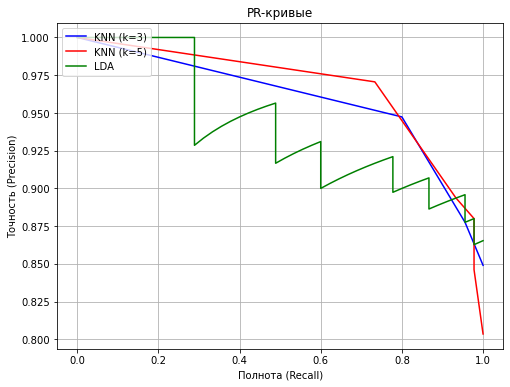

In [31]:
from sklearn.metrics import precision_recall_curve

# Вычисление PR-кривых для каждого классификатора
precision_knn_clf3, recall_knn_clf3, _ = precision_recall_curve(y_test, knn_clf3.predict_proba(X_test)[:, 1])
precision_knn_clf5, recall_knn_clf5, _ = precision_recall_curve(y_test, knn_clf5.predict_proba(X_test)[:, 1])
precision_lda, recall_lda, _ = precision_recall_curve(y_test, lda.predict_proba(X_test)[:, 1])

# Построение PR-кривых
plt.figure(figsize=(8, 6))
plt.plot(recall_knn_clf3, precision_knn_clf3, label='KNN (k=3)', color='b')
plt.plot(recall_knn_clf5, precision_knn_clf5, label='KNN (k=5)', color='r')
plt.plot(recall_lda, precision_lda, label='LDA', color='g')

plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.title('PR-кривые')
plt.legend(loc='upper left')
plt.grid()
plt.show()


 

### 10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

In [32]:
from sklearn.metrics import auc

# Вычисление ROC AUC для каждого классификатора
auc_knn_clf3 = auc(recall_knn_clf3, precision_knn_clf3)
auc_knn_clf5 = auc(recall_knn_clf5, precision_knn_clf5)
auc_lda = auc(recall_lda, precision_lda)

# Определение лучшего классификатора по значению AUC
auc_values = [auc_knn_clf3, auc_knn_clf5, auc_lda]
max_auc_index = auc_values.index(max(auc_values))

classifiers = ['KNN (k=3)', 'KNN (k=5)', 'LDA']
best_classifier = classifiers[max_auc_index]

print(f'Лучший классификатор: {best_classifier}, AUC = {max(auc_values):.2f}')


Лучший классификатор: KNN (k=5), AUC = 0.97
